                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     326.7
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           5.66e-33
Time:                        10:23:05   Log-Likelihood:                -61.832
No. Observations:                 100   AIC:                             127.7
Df Residuals:                      98   BIC:                             132.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1075      0.085     24.753      0.0

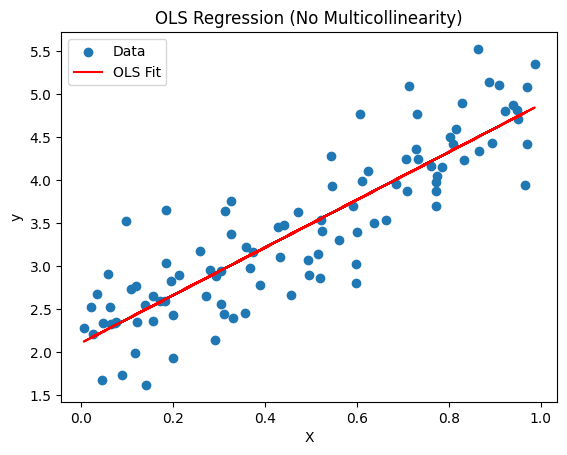

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate some data
np.random.seed(42)
X = np.random.rand(100, 1)  # 100 samples, 1 feature
y = 3 * X.squeeze() + 2 + np.random.randn(100) * 0.5  # y = 3x + 2 + noise

# Add intercept term
X_with_intercept = sm.add_constant(X)

# Perform OLS Regression
model = sm.OLS(y, X_with_intercept)
results = model.fit()

# Print results
print(results.summary())

# Plot results
plt.scatter(X, y, label="Data")
plt.plot(X, results.predict(X_with_intercept), color="red", label="OLS Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("OLS Regression (No Multicollinearity)")
plt.show()

In [2]:
# Create a dataset with perfect multicollinearity
X1 = np.random.rand(100, 1)
X2 = 2 * X1  # Perfectly correlated with X1

# Stack the features together
X_multicollinear = np.hstack([X1, X2])

# Target variable (same as before)
y = 3 * X1.squeeze() + 2 + np.random.randn(100) * 0.5

# Add intercept term
X_multicollinear_with_intercept = sm.add_constant(X_multicollinear)

# Try OLS Regression (will fail)
try:
    model_fail = sm.OLS(y, X_multicollinear_with_intercept)
    results_fail = model_fail.fit()
    print(results_fail.summary())  # This will likely fail due to singular matrix
except np.linalg.LinAlgError as e:
    print("OLS failed due to multicollinearity:", e)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     398.2
Date:                Thu, 13 Feb 2025   Prob (F-statistic):           2.71e-36
Time:                        10:23:21   Log-Likelihood:                -61.097
No. Observations:                 100   AIC:                             126.2
Df Residuals:                      98   BIC:                             131.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9325      0.095     20.446      0.0

In [3]:
from sklearn.linear_model import LinearRegression

# Create a dataset with perfect multicollinearity
X1 = np.random.rand(100, 1)
X2 = 2 * X1  # Perfectly correlated with X1
X_multicollinear = np.hstack([X1, X2])

# Train sklearn Linear Regression
model_multicollinear = LinearRegression()
model_multicollinear.fit(X_multicollinear, y)

# Print results
print("Intercept:", model_multicollinear.intercept_)
print("Coefficients:", model_multicollinear.coef_)

# Even though X2 is a perfect multiple of X1, sklearn handles it without error!

NameError: name 'LinearRegression' is not defined